In [2]:
import numpy as np
import sympy as sp

# Newton Interpolation functions
def divided_differences(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # first column is y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p
    return p

# Lagrange Interpolation functions
def lagrange_basis(x, x_values, j):
    basis = 1
    for i, xi in enumerate(x_values):
        if i != j:
            basis *= (x - xi) / (x_values[j] - xi)
    return basis

def lagrange_interpolation(x_values, y_values, x):
    n = len(x_values)
    interpolation = 0
    for j in range(n):
        interpolation += y_values[j] * lagrange_basis(x, x_values, j)
    return interpolation

# Root-finding and interpolation methods
def FixedPointMethod(function, initial_guess, error_threshold, max_iterations):
    x = sp.symbols('x')
    f = sp.sympify(function)

    for i in range(max_iterations):
        x_new = f.subs(x, initial_guess)  # Use the function itself to calculate the next approximation
        error = abs(x_new - initial_guess)
        if error < error_threshold:
            print(f"Converged to solution after {i+1} iterations.")
            return x_new
        initial_guess = x_new
    print("Did not converge within the specified number of iterations.")
    return None

def FalsePositionMethod(function, a, b, error_threshold):
    x = sp.symbols('x')
    f = sp.sympify(function)

    if f.subs(x, a) * f.subs(x, b) >= 0:
        print("No root, the False Position method is not valid")
        return None

    c = a
    for i in range(1000):  # Maximum iterations set to 1000
        c_new = (a * f.subs(x, b) - b * f.subs(x, a)) / (f.subs(x, b) - f.subs(x, a))
        if abs(f.subs(x, c_new)) < error_threshold:
            print(f"Root found after {i+1} iterations.")
            return c_new
        if f.subs(x, c_new) * f.subs(x, a) < 0:
            b = c_new
        else:
            a = c_new
    print("Method did not converge.")
    return None

def BisectionMethod(function, a, b, error_threshold):
    x = sp.symbols('x')
    f = sp.sympify(function)

    if f.subs(x, a) * f.subs(x, b) >= 0:
        print("No root, the Bisection method is not valid")
        return None

    for i in range(1000):  # Maximum iterations set to 1000
        c = (a + b) / 2
        if abs(f.subs(x, c)) < error_threshold:
            print(f"Root found after {i+1} iterations.")
            return c
        if f.subs(x, c) * f.subs(x, a) < 0:
            b = c
        else:
            a = c
    print("Method did not converge.")
    return None

def AitkenDeltaSquaredMethod(function, initial_guess, error_threshold):
    x = sp.symbols('x')
    f = sp.sympify(function)
    fdrv = sp.diff(f, x)

    x_values = [initial_guess]
    for i in range(1000):  # Maximum iterations set to 1000
        f_val = f.subs(x, x_values[-1])
        fdrv_val = fdrv.subs(x, x_values[-1])
        if abs(fdrv_val) < 1e-10:
            print("Derivative is too close to zero. Newton's method fails.")
            return None
        x_new = x_values[-1] - f_val / fdrv_val
        x_values.append(x_new)
        if i >= 2 and abs(x_values[-1] - 2 * x_values[-2] + x_values[-3]) < error_threshold:
            print(f"Root found after {i+1} iterations using Aitken Delta Squared Method.")
            return x_values[-1]
    print("Method did not converge.")
    return None

def NewtonMethod(function, initial_guess, error_threshold):
    x = sp.symbols('x')
    f = sp.sympify(function)
    fdrv = sp.diff(f, x)

    x_values = [initial_guess]
    for i in range(1000):  # Maximum iterations set to 1000
        f_val = f.subs(x, x_values[-1])
        fdrv_val = fdrv.subs(x, x_values[-1])
        if abs(fdrv_val) < 1e-10:
            print("Derivative is too close to zero. Newton's method fails.")
            return None
        x_new = x_values[-1] - f_val / fdrv_val
        x_values.append(x_new)
        if abs(x_new - x_values[-2]) < error_threshold:
            print(f"Root found after {i+1} iterations using Newton's Method.")
            return x_new
        if i >= 2 and abs(x_values[-1] - 2 * x_values[-2] + x_values[-3]) < 1e-10:
            print("Double root detected, applying Aitken Delta Squared method.")
            root_aitken = AitkenDeltaSquaredMethod(function, initial_guess, error_threshold)
            if root_aitken is not None:
                print(f"Used Aitken Delta Squared method to find the root after {i+1} iterations.")
                return root_aitken
            else:
                print("Failed to find root using Aitken Delta Squared method within the specified tolerance.")
                return None
        initial_guess = x_new
    print("Method did not converge.")
    return None

def SecantMethod(function, x0, x1, error_threshold):
    x = sp.symbols('x')
    f = sp.sympify(function)

    for i in range(1000):  # Maximum iterations set to 1000
        fx0 = f.subs(x, x0)
        fx1 = f.subs(x, x1)
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x_new - x1) < error_threshold:
            print(f"Root found after {i+1} iterations.")
            return x_new
        x0, x1 = x1, x_new
    print("Method did not converge.")
    return None

def HalleyMethod(function, initial_guess, error_threshold):
    x = sp.symbols('x')
    f = sp.sympify(function)
    fdrv = sp.diff(f, x)
    fdrv2 = sp.diff(fdrv, x)

    for i in range(1000):  # Maximum iterations set to 1000
        f_x = f.subs(x, initial_guess)
        f_xdrv = fdrv.subs(x, initial_guess)
        f_xdrv2 = fdrv2.subs(x, initial_guess)
        x_new = initial_guess - (2 * f_x * f_xdrv) / (2 * f_xdrv ** 2 - f_x * f_xdrv2)
        if abs(x_new - initial_guess) < error_threshold:
            print(f"Root found after {i+1} iterations.")
            return x_new
        initial_guess = x_new
    print("Method did not converge.")
    return None

def JacobiMethod(A, b, initial_guess, max_iterations):
    n = len(A)
    x = initial_guess.copy()

    # Check diagonal dominance
    for i in range(n):
        row_sum = sum(abs(A[i, j]) for j in range(n) if j != i)
        if abs(A[i, i]) <= row_sum:
            print("Matrix is not diagonally dominant. Jacobi method may not converge.")
            return None

    D = np.diag(A)
    R = A - np.diagflat(D)

    for i in range(max_iterations):
        x_new = (b - np.dot(R, x)) / D
        if np.linalg.norm(x_new - x, ord=np.inf) < 1e-10:
            print(f"Solution found after {i+1} iterations.")
            return x_new
        x = x_new

    print("Jacobi method did not converge within the specified number of iterations.")
    return None

def main():
    print("Choose a method:")
    print("1. Fixed Point Method")
    print("2. False Position Method")
    print("3. Bisection Method")
    print("4. Newton's Method")
    print("5. Secant Method")
    print("6. Halley's Method")
    print("7. Newton's Method with Aitken Delta Squared")
    print("8. Jacobi Method")
    print("9. Newton Interpolation")
    print("10. Lagrange Interpolation")

    equation_choice = int(input("Enter your choice: "))

    error_threshold = None

    if equation_choice not in [8, 9, 10]:
        error_threshold = float(input("Enter the error threshold: "))

    if equation_choice == 1:
        function_input = input("Enter the function expression for Fixed Point Method: ")
        initial_guess = float(input("Enter the initial guess: "))
        max_iterations = int(input("Enter the maximum number of iterations: "))
        solution = FixedPointMethod(function_input, initial_guess, error_threshold, max_iterations)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 2:
        function_input = input("Enter the function expression for False Position Method: ")
        a = float(input("Enter the lower bound: "))
        b = float(input("Enter the upper bound: "))
        solution = FalsePositionMethod(function_input, a, b, error_threshold)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 3:
        function_input = input("Enter the function expression for Bisection Method: ")
        a = float(input("Enter the lower bound: "))
        b = float(input("Enter the upper bound: "))
        solution = BisectionMethod(function_input, a, b, error_threshold)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 4:
        function_input = input("Enter the function expression for Newton's Method: ")
        initial_guess = float(input("Enter the initial guess: "))
        solution = NewtonMethod(function_input, initial_guess, error_threshold)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 5:
        function_input = input("Enter the function expression for Secant Method: ")
        x0 = float(input("Enter the first initial guess: "))
        x1 = float(input("Enter the second initial guess: "))
        solution = SecantMethod(function_input, x0, x1, error_threshold)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 6:
        function_input = input("Enter the function expression for Halley's Method: ")
        initial_guess = float(input("Enter the initial guess: "))
        solution = HalleyMethod(function_input, initial_guess, error_threshold)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 7:
        function_input = input("Enter the function expression for Newton's Method with Aitken Delta Squared: ")
        initial_guess = float(input("Enter the initial guess: "))
        solution = NewtonMethodWithAitkenDelta(function_input, initial_guess, error_threshold)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")

    elif equation_choice == 8:
        A_input = input("Enter the coefficient matrix (comma-separated): ")
        b_input = input("Enter the right-hand side vector (comma-separated): ")
        initial_guess_input = input("Enter the initial guess for the solution vector (comma-separated): ")
        A = np.array(eval(A_input))
        b = np.array(eval(b_input))
        initial_guess = np.array(eval(initial_guess_input))
        max_iterations = int(input("Enter the maximum number of iterations: "))
        solution = JacobiMethod(A, b, initial_guess, max_iterations)
        if solution is not None:
            print("Approximate solution:", solution)
        else:
            print("Failed to find solution within the specified tolerance.")
            
    elif equation_choice == 9:
        x_data = list(map(float, input("Enter the x data points (comma-separated): ").split(',')))
        y_data = list(map(float, input("Enter the y data points (comma-separated): ").split(',')))
        coef = divided_differences(x_data, y_data)
        print("Divided difference coefficients:")
        print(coef)
        x = float(input("Enter the x value to interpolate: "))
        y = newton_poly(coef, x_data, x)
        print(f"The interpolated value at x = {x} is {y}")

    elif equation_choice == 10:
        x_data = list(map(float, input("Enter the x data points (comma-separated): ").split(',')))
        y_data = list(map(float, input("Enter the y data points (comma-separated): ").split(',')))
        x = float(input("Enter the x value to interpolate: "))
        y = lagrange_interpolation(x_data, y_data, x)
        print(f"The interpolated value at x = {x} is {y}")

    else:
        print("Invalid choice.")

if __name__ == "__main__":
    main()


Choose a method:
1. Fixed Point Method
2. False Position Method
3. Bisection Method
4. Newton's Method
5. Secant Method
6. Halley's Method
7. Newton's Method with Aitken Delta Squared
8. Jacobi Method
9. Newton Interpolation
10. Lagrange Interpolation


Enter your choice:  1


KeyboardInterrupt: Interrupted by user

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_solve(A, b, initial_guess=None, max_iterations=1000, error_threshold=1e-10):
    n = len(A)
    x = np.zeros(n) if initial_guess is None else initial_guess
    errors = []

    # Check diagonal dominance
    for i in range(n):
        row_sum = sum(abs(A[i, j]) for j in range(n) if j != i)
        if abs(A[i, i]) <= row_sum:
            raise ValueError("Matrix is not diagonally dominant. Jacobi method may not converge.")

    for iteration in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sigma) / A[i, i]

        error = np.linalg.norm(x_new - x, np.inf)  # Calculate the error using the infinity norm
        errors.append(error)
        if error < error_threshold:
            print("Jacobi method converged after", iteration + 1, "iterations.")
            return x_new, errors

        x = x_new.copy()

    raise RuntimeError("Jacobi method did not converge within the specified number of iterations.")

def gauss_seidel_solve(A, b, initial_guess=None, max_iterations=1000, error_threshold=1e-10):
    n = len(A)
    x = np.zeros(n) if initial_guess is None else initial_guess
    errors = []

    for iteration in range(max_iterations):
        x_old = x.copy()
        for i in range(n):
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - sigma) / A[i, i]

        error = np.linalg.norm(x - x_old, np.inf)  # Calculate the error using the infinity norm
        errors.append(error)
        if error < error_threshold:
            print("Gauss-Seidel method converged after", iteration + 1, "iterations.")
            return x, errors

    raise RuntimeError("Gauss-Seidel method did not converge within the specified number of iterations.")

def main():
    # Define a sample linear system
    A = np.array([[4, 2, 0], [2, 1, -1], [ 0, 4, 5]])
    b = np.array([ 10, 10, 10])
    # Solve using Jacobi method
    print("\nUsing Jacobi method:")
    try:
        jacobi_solution, jacobi_errors = jacobi_solve(A, b)
        print("Jacobi solution:", jacobi_solution)
    except ValueError as e:
        print(e)

    # Solve using Gauss-Seidel method
    print("\nUsing Gauss-Seidel method:")
    try:
        gauss_seidel_solution, gauss_seidel_errors = gauss_seidel_solve(A, b)
        print("Gauss-Seidel solution:", gauss_seidel_solution)
    except RuntimeError as e:
        print(e)

    # Plot the errors for both methods
    plt.figure(figsize=(10, 6))
    plt.semilogy(jacobi_errors, label='Jacobi Method', marker='o')
    plt.semilogy(gauss_seidel_errors, label='Gauss-Seidel Method', marker='x')
    plt.xlabel('Iteration')
    plt.ylabel('Error (log scale)')
    plt.title('Convergence of Jacobi and Gauss-Seidel Methods')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()



Using Jacobi method:
Matrix is not diagonally dominant. Jacobi method may not converge.

Using Gauss-Seidel method:
Gauss-Seidel method converged after 18 iterations.
Gauss-Seidel solution: [-1.875  8.75  -5.   ]


UnboundLocalError: cannot access local variable 'jacobi_errors' where it is not associated with a value

<Figure size 1000x600 with 0 Axes>

In [ ]:
def forward_difference(f, x, h):
    """
    Calculate the forward difference derivative of a function f at point x with step size h.
    
    Parameters:
    f (function): The function to differentiate.
    x (float): The point at which to evaluate the derivative.
    h (float): The step size.
    
    Returns:
    float: The forward difference approximation of the derivative at x.
    """
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    """
    Calculate the backward difference derivative of a function f at point x with step size h.
    
    Parameters:
    f (function): The function to differentiate.
    x (float): The point at which to evaluate the derivative.
    h (float): The step size.
    
    Returns:
    float: The backward difference approximation of the derivative at x.
    """
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    """
    Calculate the central difference derivative of a function f at point x with step size h.
    
    Parameters:
    f (function): The function to differentiate.
    x (float): The point at which to evaluate the derivative.
    h (float): The step size.
    
    Returns:
    float: The central difference approximation of the derivative at x.
    """
    return (f(x + h) - f(x - h)) / (2 * h)

def three_point_forward_difference(f, x, h):
    """
    Calculate the three-point forward difference derivative of a function f at point x with step size h.
    
    Parameters:
    f (function): The function to differentiate.
    x (float): The point at which to evaluate the derivative.
    h (float): The step size.
    
    Returns:
    float: The three-point forward difference approximation of the derivative at x.
    """
    return (3*f(x) + 4*f(x + h) - f(x + 2*h)) / -(2 * h)

def three_point_backward_difference(f, x, h):
    """
    Calculate the three-point backward difference derivative of a function f at point x with step size h.
    
    Parameters:
    f (function): The function to differentiate.
    x (float): The point at which to evaluate the derivative.
    h (float): The step size.
    
    Returns:
    float: The three-point backward difference approximation of the derivative at x.
    """
    return (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2 * h)

if __name__ == "__main__":
    import math
    
    # Input the function from the user
    func_str = input("Enter the function f(x) (use 'math' module for functions like sin, cos, exp, etc.): ")
    
    # Ask the user which differentiation method they want to use
    print("Choose the differentiation method:")
    print("1. Forward difference")
    print("2. Backward difference")
    print("3. Central difference")
    print("4. Three-point forward difference")
    print("5. Three-point backward difference")
    method = int(input("Enter the number of the method: "))
    
    # Input the point x at which to evaluate the derivative
    x = float(input("Enter the point x at which to evaluate the derivative: "))
    
    # Input the step size h
    h = float(input("Enter the step size h: "))
    
    # Define the function from the input string
    def f(x):
        return eval(func_str)
    
    # Perform the chosen differentiation method
    if method == 1:
        result = forward_difference(f, x, h)
        print(f"Forward difference approximation of the derivative at x = {x}: {result}")
    elif method == 2:
        result = backward_difference(f, x, h)
        print(f"Backward difference approximation of the derivative at x = {x}: {result}")
    elif method == 3:
        result = central_difference(f, x, h)
        print(f"Central difference approximation of the derivative at x = {x}: {result}")
    elif method == 4:
        result = three_point_forward_difference(f, x, h)
        print(f"Three-point forward difference approximation of the derivative at x = {x}: {result}")
    elif method == 5:
        result = three_point_backward_difference(f, x, h)
        print(f"Three-point backward difference approximation of the derivative at x = {x}: {result}")
    else:
        print("Invalid method chosen. Please enter a number between 1 and 5.")


Enter the function f(x) (use 'math' module for functions like sin, cos, exp, etc.):  1


Choose the differentiation method:
1. Forward difference
2. Backward difference
3. Central difference
4. Three-point forward difference
5. Three-point backward difference


Enter the function to integrate (use 'x' as the variable): 1/(x**2+9)
Enter the lower limit of integration: 0
Enter the upper limit of integration: 3
Enter the number of intervals: 6
Simpson's Rule Result: 0.2617993150780036
Trapezoidal Rule Result: 0.2614135888726053
Exact Value: 0.2617993877991494
Simpson's Rule Absolute Error: 7.272114582734801e-08
Trapezoidal Rule Absolute Error: 0.00038579892654411196


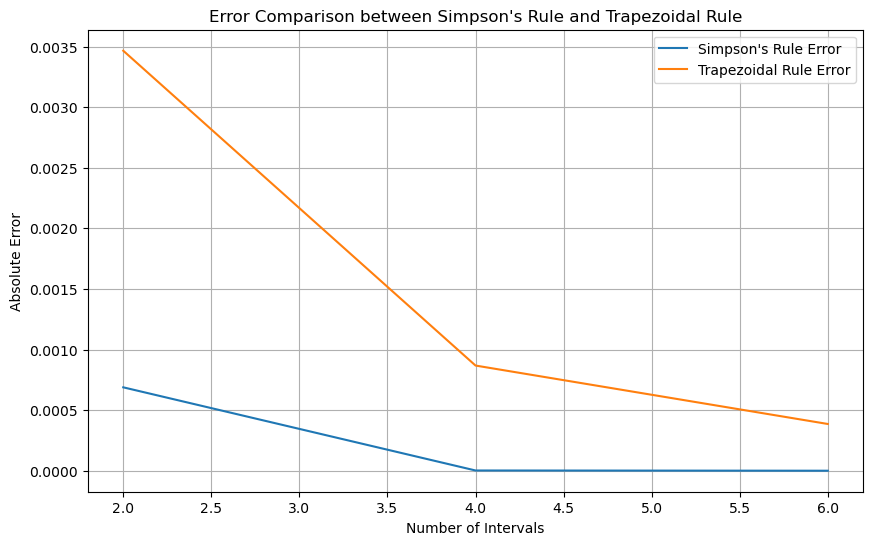

In [1]:
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1  # Simpson's rule requires an even number of intervals
    h = (b - a) / n
    result = f(a) + f(b)
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            result += 2 * f(x)
        else:
            result += 4 * f(x)
    result *= h / 3
    return result

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    result = (f(a) + f(b)) 
    for i in range(1, n):
        x = a + i * h
        result += 2*f(x)
    result *= h/2
    return result

def main():
    # Get user input for the function, limits, and number of intervals
    function_str = input("Enter the function to integrate (use 'x' as the variable): ")
    a = float(input("Enter the lower limit of integration: "))
    b = float(input("Enter the upper limit of integration: "))
    n = int(input("Enter the number of intervals: "))

    # Convert the input string to a function
    def f(x):
        return eval(function_str)

    # Calculate the integral using both methods
    simpson_result = simpsons_rule(f, a, b, n)
    trapezoidal_result = trapezoidal_rule(f, a, b, n)

    # Calculate the exact value using sympy
    x = sp.symbols('x')
    exact_value = float(sp.integrate(function_str, (x, a, b)))

    # Calculate the absolute errors
    simpson_error = abs(simpson_result - exact_value)
    trapezoidal_error = abs(trapezoidal_result - exact_value)

    # Display the results
    print(f"Simpson's Rule Result: {simpson_result}")
    print(f"Trapezoidal Rule Result: {trapezoidal_result}")
    print(f"Exact Value: {exact_value}")
    print(f"Simpson's Rule Absolute Error: {simpson_error}")
    print(f"Trapezoidal Rule Absolute Error: {trapezoidal_error}")

    # Generate the graph showing the difference
    interval_counts = range(2, n + 1, 2)
    simpson_errors = []
    trapezoidal_errors = []

    for count in interval_counts:
        simpson_result = simpsons_rule(f, a, b, count)
        trapezoidal_result = trapezoidal_rule(f, a, b, count)
        simpson_error = abs(simpson_result - exact_value)
        trapezoidal_error = abs(trapezoidal_result - exact_value)
        simpson_errors.append(simpson_error)
        trapezoidal_errors.append(trapezoidal_error)

    plt.figure(figsize=(10, 6))
    plt.plot(interval_counts, simpson_errors, label="Simpson's Rule Error")
    plt.plot(interval_counts, trapezoidal_errors, label="Trapezoidal Rule Error")
    plt.xlabel('Number of Intervals')
    plt.ylabel('Absolute Error')
    plt.title('Error Comparison between Simpson\'s Rule and Trapezoidal Rule')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [1]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import sympy as sp
from tabulate import tabulate

# Function to parse user input for the ODE
def parse_function(equation, var='x', func='y'):
    x, y = sp.symbols(f'{var} {func}')
    expr = sp.sympify(equation)
    return sp.lambdify((x, y), expr, 'numpy')

# Euler's Method
def euler(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * f(x[i], y[i])
    return x, y

# Taylor First Order
def taylor_first_order(f, f_prime, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * f(x[i], y[i]) + (h**2 / 2) * f_prime(x[i], y[i])
    return x, y

# Modified Taylor Second Order
def modified_taylor_second_order(f, f_prime, x0, y0, h, n):
    return taylor_first_order(f, f_prime, x0, y0, h, n)

# Runge-Kutta Second Order
def runge_kutta_second_order(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        x[i+1] = x[i] + h
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h, y[i] + k1)
        y[i+1] = y[i] + 0.5 * (k1 + k2)
    return x, y

# Runge-Kutta Third Order
def runge_kutta_third_order(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        x[i+1] = x[i] + h
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(x[i] + h, y[i] - k1 + 2 * k2)
        y[i+1] = y[i] + (1/6) * (k1 + 4 * k2 + k3)
    return x, y

# Runge-Kutta Fourth Order
def runge_kutta_fourth_order(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        x[i+1] = x[i] + h
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return x, y

def compute():
    # Get user inputs
    x0 = float(x0_entry.get())
    y0 = float(y0_entry.get())
    h = float(h_entry.get())
    n = int(n_entry.get())
    ode = ode_entry.get()

    # Parse user input
    f = parse_function(ode, var='x', func='y')

    # Compute solutions
    x_euler, y_euler = euler(f, x0, y0, h, n)
    x_modified_taylor, y_modified_taylor = modified_taylor_second_order(f, f, x0, y0, h, n)
    x_rk2, y_rk2 = runge_kutta_second_order(f, x0, y0, h, n)
    x_rk3, y_rk3 = runge_kutta_third_order(f, x0, y0, h, n)
    x_rk4, y_rk4 = runge_kutta_fourth_order(f, x0, y0, h, n)

    # Display results in a table
    table = [["x", "Euler Method", "Modified Taylor Second Order", "Runge-Kutta Second Order", "Runge-Kutta Third Order", "Runge-Kutta Fourth Order"]]
    for i in range(n + 1):
        table.append([x_euler[i], y_euler[i], y_modified_taylor[i], y_rk2[i], y_rk3[i], y_rk4[i]])

    # Add the last value for Runge-Kutta Fourth Order
    table[-1][5] = y_rk4[-1]

    result_text.delete(1.0, tk.END)
    result_text.insert(tk.END, tabulate(table, headers='firstrow', tablefmt='grid'))

# Create GUI
root = tk.Tk()
root.title("ODE Solver")

# Create input fields
x0_label = ttk.Label(root, text="Initial x value:")
x0_label.grid(row=0, column=0, padx=5, pady=5)
x0_entry = ttk.Entry(root)
x0_entry.grid(row=0, column=1, padx=5, pady=5)

y0_label = ttk.Label(root, text="Initial y value:")
y0_label.grid(row=1, column=0, padx=5, pady=5)
y0_entry = ttk.Entry(root)
y0_entry.grid(row=1, column=1, padx=5, pady=5)

h_label = ttk.Label(root, text="Step size (h):")
h_label.grid(row=2, column=0, padx=5, pady=5)
h_entry = ttk.Entry(root)
h_entry.grid(row=2, column=1, padx=5, pady=5)

n_label = ttk.Label(root, text="Number of steps (n):")
n_label.grid(row=3, column=0, padx=5, pady=5)
n_entry = ttk.Entry(root)
n_entry.grid(row=3, column=1, padx=5, pady=5)

ode_label = ttk.Label(root, text="ODE (dy/dx = f(x, y)):")
ode_label.grid(row=4, column=0, padx=5, pady=5)
ode_entry = ttk.Entry(root, width=50)
ode_entry.grid(row=4, column=1, padx=5, pady=5)

compute_button = ttk.Button(root, text="Compute", command=compute)
compute_button.grid(row=5, column=0, columnspan=2, pady=10)

result_label = ttk.Label(root, text="Results:")
result_label.grid(row=6, column=0, padx=5, pady=5, sticky='w')

# Create a larger text area that fills two columns
result_text = tk.Text(root, height=20, width=100)
result_text.grid(row=7, column=0, columnspan=2, padx=5, pady=5, sticky='nesw')

# Configure row and column weights to allow text area to expand
root.grid_rowconfigure(7, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

root.mainloop()

